<a href="https://colab.research.google.com/github/luisCorl/eaf-simbolico/blob/main/simbolico_EAF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install escapy


In [7]:
pip install ddd_layer

In [2]:
pip install symengine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 33.2 MB/s eta 0:00:00


In [4]:
pip install memory_profiler

In [8]:
from escapy import scapy

DDD15V3


In [ ]:
#no olvides conectar con Google drive o asegurarte de que
#se lee correctamente el archivo electrodo.cir

In [10]:
scapy.MNAf("/content/drive/MyDrive/Colab Notebooks/electrodo.cir")


estamos verificando..
  elemento  nodo1 +  nodo2 - nodo3 + nodo4 -  miu miu2 miu3   t1   t2
0       R1        1        4     NaN     NaN  NaN  NaN  NaN  NaN  NaN
1       R2        2        4     NaN     NaN  NaN  NaN  NaN  NaN  NaN
2       R3        3        4     NaN     NaN  NaN  NaN  NaN  NaN  NaN
3       R4        1        2     NaN     NaN  NaN  NaN  NaN  NaN  NaN
4       R5        2        3     NaN     NaN  NaN  NaN  NaN  NaN  NaN
5       R6        3        1     NaN     NaN  NaN  NaN  NaN  NaN  NaN
6       V1        1        0     NaN     NaN  NaN  NaN  NaN  NaN  NaN
7       V2        2        0     NaN     NaN  NaN  NaN  NaN  NaN  NaN
8       V3        3        0     NaN     NaN  NaN  NaN  NaN  NaN  NaN


In [11]:
A,x,z = scapy.formula_sympy()
X = scapy.resuelve_ADJ(A,x,z)
X = scapy.simplifica(X)

tiempo de calculo en sympy ADJ:  27.79210090637207


In [12]:
X[0]

V₁

In [13]:
X[1]

V₂

In [14]:
X[2]

V₃

In [15]:
X[3]

R₁⋅R₂⋅V₃ + R₁⋅R₃⋅V₂ + R₂⋅R₃⋅V₁
──────────────────────────────
    R₁⋅R₂ + R₁⋅R₃ + R₂⋅R₃     

In [16]:
print(X[4])

(-R1*R2*R4*V1 + R1*R2*R4*V3 - R1*R2*R6*V1 + R1*R2*R6*V2 - R1*R3*R4*V1 + R1*R3*R4*V3 - R1*R3*R6*V1 + R1*R3*R6*V2 - R2*R3*R4*V1 + R2*R3*R4*V3 - R2*R3*R6*V1 + R2*R3*R6*V2 - R2*R4*R6*V1 + R2*R4*R6*V3 - R3*R4*R6*V1 + R3*R4*R6*V2)/(R4*R6*(R1*R2 + R1*R3 + R2*R3))


In [17]:
print(X[5])

(-R1*R2*R4*V2 + R1*R2*R4*V3 + R1*R2*R5*V1 - R1*R2*R5*V2 - R1*R3*R4*V2 + R1*R3*R4*V3 + R1*R3*R5*V1 - R1*R3*R5*V2 - R1*R4*R5*V2 + R1*R4*R5*V3 - R2*R3*R4*V2 + R2*R3*R4*V3 + R2*R3*R5*V1 - R2*R3*R5*V2 + R3*R4*R5*V1 - R3*R4*R5*V2)/(R4*R5*(R1*R2 + R1*R3 + R2*R3))


In [18]:
print(X[6])

(R1*R2*R5*V1 - R1*R2*R5*V3 + R1*R2*R6*V2 - R1*R2*R6*V3 + R1*R3*R5*V1 - R1*R3*R5*V3 + R1*R3*R6*V2 - R1*R3*R6*V3 + R1*R5*R6*V2 - R1*R5*R6*V3 + R2*R3*R5*V1 - R2*R3*R5*V3 + R2*R3*R6*V2 - R2*R3*R6*V3 + R2*R5*R6*V1 - R2*R5*R6*V3)/(R5*R6*(R1*R2 + R1*R3 + R2*R3))


In [19]:
from matplotlib import pyplot as plt
import numpy as np
t = np.linspace(0,0.02,200)

In [52]:
#generamos los vectores de voltaje v1,v2 y v3
v1 = []
ampl = 10e3
w = 60*2*np.pi
for i in t:
  tempo = ampl*np.sin(w*i)
  v1.append(tempo)

v2 = []
for i in t:
  tempo =  ampl*np.sin(w*i+((4*np.pi)/6))
  v2.append(tempo)

v3 = []
for i in t:
  tempo = ampl*np.sin(w*i+((8*np.pi)/6))
  v3.append(tempo)


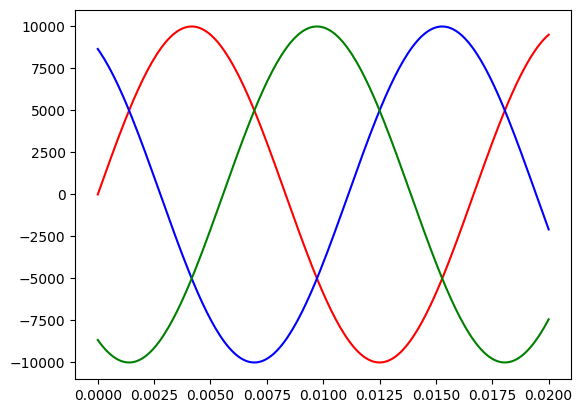

In [53]:
plt.plot(t,v1,color="red")
plt.plot(t,v2,color="blue")
plt.plot(t,v3,color="green")
plt.show()

In [54]:
#valores fijos de prueba en las resistencias
R1 = 1.3e3
R2 = 1.8e3
R3 = 1.2e3
R4 = 2.5e3
R5 = 0.78e3
R6 = 0.957e3


In [55]:
i1 = []; i2 = []; i3 = []
for i in range(len(t)):
  V1 = v1[i]; V2 = v2[i]; V3 = v3[i]
  tempo1 = (-R1*R2*R4*V1 + R1*R2*R4*V3 - R1*R2*R6*V1 + R1*R2*R6*V2 - R1*R3*R4*V1 + R1*R3*R4*V3 - R1*R3*R6*V1 + R1*R3*R6*V2 - R2*R3*R4*V1 + R2*R3*R4*V3 - R2*R3*R6*V1 + R2*R3*R6*V2 - R2*R4*R6*V1 + R2*R4*R6*V3 - R3*R4*R6*V1 + R3*R4*R6*V2)/(R4*R6*(R1*R2 + R1*R3 + R2*R3))
  i1.append(tempo1)

  tempo2 = (-R1*R2*R4*V2 + R1*R2*R4*V3 + R1*R2*R5*V1 - R1*R2*R5*V2 - R1*R3*R4*V2 + R1*R3*R4*V3 + R1*R3*R5*V1 - R1*R3*R5*V2 - R1*R4*R5*V2 + R1*R4*R5*V3 - R2*R3*R4*V2 + R2*R3*R4*V3 + R2*R3*R5*V1 - R2*R3*R5*V2 + R3*R4*R5*V1 - R3*R4*R5*V2)/(R4*R5*(R1*R2 + R1*R3 + R2*R3))
  i2.append(tempo2)

  tempo3 = (R1*R2*R5*V1 - R1*R2*R5*V3 + R1*R2*R6*V2 - R1*R2*R6*V3 + R1*R3*R5*V1 - R1*R3*R5*V3 + R1*R3*R6*V2 - R1*R3*R6*V3 + R1*R5*R6*V2 - R1*R5*R6*V3 + R2*R3*R5*V1 - R2*R3*R5*V3 + R2*R3*R6*V2 - R2*R3*R6*V3 + R2*R5*R6*V1 - R2*R5*R6*V3)/(R5*R6*(R1*R2 + R1*R3 + R2*R3))
  i3.append(tempo3)




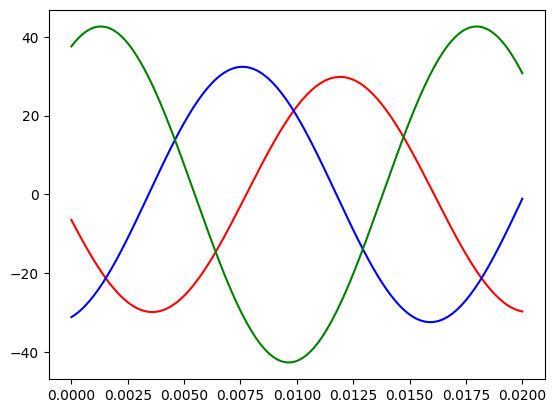

In [56]:
plt.plot(t,i1,color="red")
plt.plot(t,i2,color="blue")
plt.plot(t,i3,color="green")
plt.show()

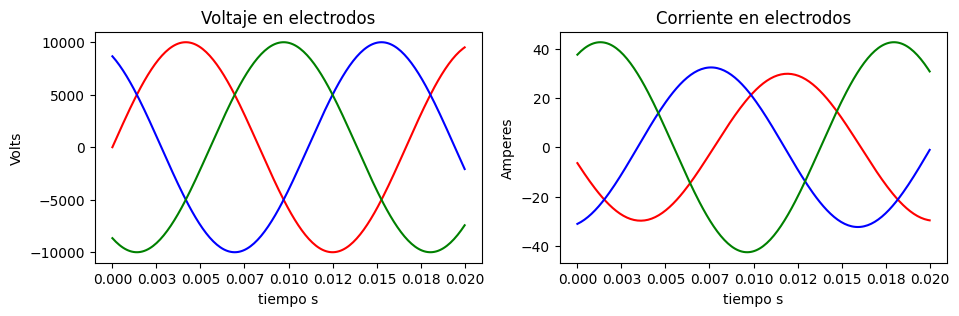

In [58]:

fig, axs = plt.subplots(1,2,figsize=(11,3))
axs[0].xaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))
axs[0].plot(t,v1,color="red")
axs[0].plot(t,v2,color="blue")
axs[0].plot(t,v3,color="green")
axs[0].set_title("Voltaje en electrodos")
axs[0].set_xlabel("tiempo s")
axs[0].set_ylabel("Volts")
axs[1].xaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))
axs[1].plot(t,i1,color="red")
axs[1].plot(t,i2,color="blue")
axs[1].plot(t,i3,color="green")
axs[1].set_title("Corriente en electrodos")
axs[1].set_xlabel("tiempo s")
axs[1].set_ylabel("Amperes")

plt.show()


In [59]:
L = 6
import numpy as np
a = (L/2)* np.tan(np.radians(30))
b = np.sqrt((L/2)**2 + a**2)
c = np.arctan((2*a+b)/L)
c = 60-np.rad2deg(c)
d = 120-c
e = (L*np.sin(np.radians(60)))/(np.sin(np.radians(d)))
f = np.sqrt((L/2)**2+(a+(b/2))**2)

print("a",a)
print("b",b)
print("c",c)
print("d",d)
print("e",e)
print("f",f)



a 1.7320508075688772
b 3.4641016151377544
c 10.893394649130904
d 109.1066053508691
e 5.499090833947008
f 4.58257569495584


In [60]:
import numpy as np
L = 6

In [61]:
#calculo de parámetros
a = (L/2)* np.tan(np.radians(30))
b = np.sqrt((L/2)**2 + a**2)
c = np.arctan((2*a+b)/L)
c = 60-np.rad2deg(c)
d = 120-c
e = (L*np.sin(np.radians(60)))/(np.sin(np.radians(d)))
f = np.sqrt((L/2)**2+(a+(b/2))**2)

print("a",a)
print("b",b)
print("c",c)
print("d",d)
print("e",e)
print("f",f)

a 1.7320508075688772
b 3.4641016151377544
c 10.893394649130904
d 109.1066053508691
e 5.499090833947008
f 4.58257569495584


xe1 0.001
xe2 0.5
xe3 0.001
XR4 0.2505
XR5 0.2505
XR6 0.001
XR1 0.08416666666666668
XR2 0.3336666666666666
XR3 0.0841666666666667

R1 545.4545454545454
R2 145.84275234442228
R3 460.8294930875575
R4 198.61959382293063
R5 195.6985459598035
R6 6082.725060827252


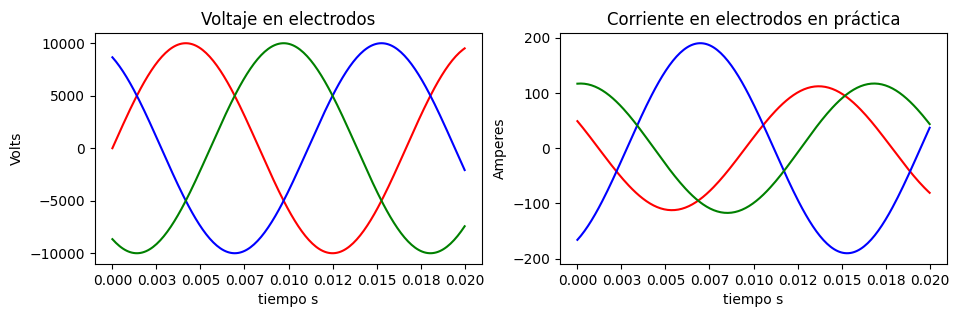

In [62]:
xe1 = 0.001 #inmersión en electrodo 1
xe2 = 0.5   #inmersión en electrodo 2
xe3 = 0.001 #inmersión en electrodo 3


#cálculo de inmersiones unitarias
XR4 = (xe1*(L/2))/L + (xe2*(L/2))/L
XR5 = (xe2*(L/2))/L + (xe3*(L/2))/L
XR6 = (xe1*(L/2))/L + (xe3*(L/2))/L
XR1 = (xe1*(a+b/2))/(a+b) + (xe2*(e-f))/e + (xe3*(e-f))/e
XR2 = (xe2*(a+b/2))/(a+b) + (xe1*(e-f))/e + (xe3*(e-f))/e
XR3 = (xe3*(a+b/2))/(a+b) + (xe1*(e-f))/e + (xe2*(e-f))/e

print("xe1",xe1)
print("xe2",xe2)
print("xe3",xe3)
print("XR4",XR4)
print("XR5",XR5)
print("XR6",XR6)
print("XR1",XR1)
print("XR2",XR2)
print("XR3",XR3)
#coeficientes de conductancia
c1 = 0.02
c2 = 0.0201
c3 = 0.024
c4 = 0.0195
c5 = 0.0198
c6 = 0.0144
P = 1
Gs = 0.000150
#cálculo culo de resistencias
R1 = 1/(c1*XR1+Gs*P)
R2 = 1/(c2*XR2+Gs*P)
R3 = 1/(c3*XR3+Gs*P)
R4 = 1/(c4*XR4+Gs*P)
R5 = 1/(c5*XR5+Gs*P)
R6 = 1/(c6*XR6+Gs*P)

print("")
print("R1",R1)
print("R2",R2)
print("R3",R3)
print("R4",R4)
print("R5",R5)
print("R6",R6)


i1 = []; i2 = []; i3 = []
for i in range(len(t)):
  V1 = v1[i]; V2 = v2[i]; V3 = v3[i]
  tempo1 = (-R1*R2*R4*V1 + R1*R2*R4*V3 - R1*R2*R6*V1 + R1*R2*R6*V2 - R1*R3*R4*V1 + R1*R3*R4*V3 - R1*R3*R6*V1 + R1*R3*R6*V2 - R2*R3*R4*V1 + R2*R3*R4*V3 - R2*R3*R6*V1 + R2*R3*R6*V2 - R2*R4*R6*V1 + R2*R4*R6*V3 - R3*R4*R6*V1 + R3*R4*R6*V2)/(R4*R6*(R1*R2 + R1*R3 + R2*R3))
  i1.append(tempo1)

  tempo2 = (-R1*R2*R4*V2 + R1*R2*R4*V3 + R1*R2*R5*V1 - R1*R2*R5*V2 - R1*R3*R4*V2 + R1*R3*R4*V3 + R1*R3*R5*V1 - R1*R3*R5*V2 - R1*R4*R5*V2 + R1*R4*R5*V3 - R2*R3*R4*V2 + R2*R3*R4*V3 + R2*R3*R5*V1 - R2*R3*R5*V2 + R3*R4*R5*V1 - R3*R4*R5*V2)/(R4*R5*(R1*R2 + R1*R3 + R2*R3))
  i2.append(tempo2)

  tempo3 = (R1*R2*R5*V1 - R1*R2*R5*V3 + R1*R2*R6*V2 - R1*R2*R6*V3 + R1*R3*R5*V1 - R1*R3*R5*V3 + R1*R3*R6*V2 - R1*R3*R6*V3 + R1*R5*R6*V2 - R1*R5*R6*V3 + R2*R3*R5*V1 - R2*R3*R5*V3 + R2*R3*R6*V2 - R2*R3*R6*V3 + R2*R5*R6*V1 - R2*R5*R6*V3)/(R5*R6*(R1*R2 + R1*R3 + R2*R3))
  i3.append(tempo3)



fig, axs = plt.subplots(1,2,figsize=(11,3))
axs[0].xaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))
axs[0].plot(t,v1,color="red")
axs[0].plot(t,v2,color="blue")
axs[0].plot(t,v3,color="green")
axs[0].set_title("Voltaje en electrodos")
axs[0].set_xlabel("tiempo s")
axs[0].set_ylabel("Volts")
axs[1].xaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))
axs[1].plot(t,i1,color="red")
axs[1].plot(t,i2,color="blue")
axs[1].plot(t,i3,color="green")
axs[1].set_title("Corriente en electrodos en práctica")
axs[1].set_xlabel("tiempo s")
axs[1].set_ylabel("Amperes")

plt.show()


xe1 0.4
xe2 0.4
xe3 0.4
XR4 0.4000000000000001
XR5 0.4000000000000001
XR6 0.4000000000000001
XR1 0.4000000000000001
XR2 0.4000000000000001
XR3 0.4000000000000001

R1 122.69938650306744
R2 122.10012210012206
R3 102.56410256410253
R4 125.78616352201254
R5 123.91573729863688
R6 169.20473773265647


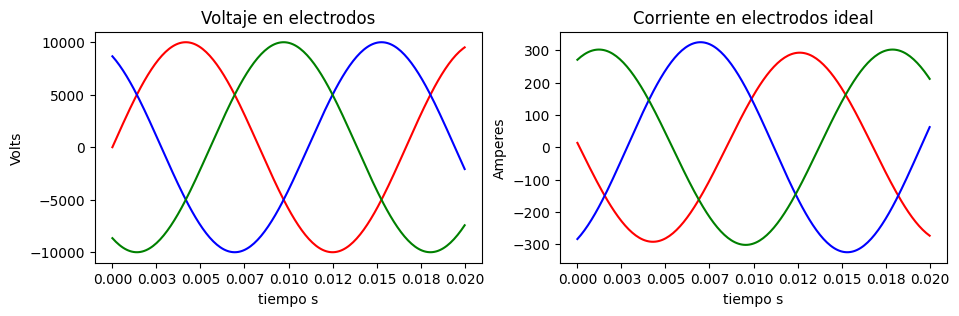

In [63]:
xe1 = 0.4 #inmersión en electrodo 1
xe2 = 0.4 #inmersión en electrodo 2
xe3 = 0.4 #inmersión en electrodo 3


#cálculo de inmersiones unitarias
XR4 = (xe1*(L/2))/L + (xe2*(L/2))/L
XR5 = (xe2*(L/2))/L + (xe3*(L/2))/L
XR6 = (xe1*(L/2))/L + (xe3*(L/2))/L
XR1 = (xe1*(a+b/2))/(a+b) + (xe2*(e-f))/e + (xe3*(e-f))/e
XR2 = (xe2*(a+b/2))/(a+b) + (xe1*(e-f))/e + (xe3*(e-f))/e
XR3 = (xe3*(a+b/2))/(a+b) + (xe1*(e-f))/e + (xe2*(e-f))/e

print("xe1",xe1)
print("xe2",xe2)
print("xe3",xe3)
print("XR4",XR4)
print("XR5",XR5)
print("XR6",XR6)
print("XR1",XR1)
print("XR2",XR2)
print("XR3",XR3)
#coeficientes de conductancia
c1 = 0.02
c2 = 0.0201
c3 = 0.024
c4 = 0.0195
c5 = 0.0198
c6 = 0.0144
P = 1
Gs = 0.000150
#cálculo culo de resistencias
R1 = 1/(c1*XR1+Gs*P)
R2 = 1/(c2*XR2+Gs*P)
R3 = 1/(c3*XR3+Gs*P)
R4 = 1/(c4*XR4+Gs*P)
R5 = 1/(c5*XR5+Gs*P)
R6 = 1/(c6*XR6+Gs*P)

print("")
print("R1",R1)
print("R2",R2)
print("R3",R3)
print("R4",R4)
print("R5",R5)
print("R6",R6)


i1 = []; i2 = []; i3 = []
for i in range(len(t)):
  V1 = v1[i]; V2 = v2[i]; V3 = v3[i]
  tempo1 = (-R1*R2*R4*V1 + R1*R2*R4*V3 - R1*R2*R6*V1 + R1*R2*R6*V2 - R1*R3*R4*V1 + R1*R3*R4*V3 - R1*R3*R6*V1 + R1*R3*R6*V2 - R2*R3*R4*V1 + R2*R3*R4*V3 - R2*R3*R6*V1 + R2*R3*R6*V2 - R2*R4*R6*V1 + R2*R4*R6*V3 - R3*R4*R6*V1 + R3*R4*R6*V2)/(R4*R6*(R1*R2 + R1*R3 + R2*R3))
  i1.append(tempo1)

  tempo2 = (-R1*R2*R4*V2 + R1*R2*R4*V3 + R1*R2*R5*V1 - R1*R2*R5*V2 - R1*R3*R4*V2 + R1*R3*R4*V3 + R1*R3*R5*V1 - R1*R3*R5*V2 - R1*R4*R5*V2 + R1*R4*R5*V3 - R2*R3*R4*V2 + R2*R3*R4*V3 + R2*R3*R5*V1 - R2*R3*R5*V2 + R3*R4*R5*V1 - R3*R4*R5*V2)/(R4*R5*(R1*R2 + R1*R3 + R2*R3))
  i2.append(tempo2)

  tempo3 = (R1*R2*R5*V1 - R1*R2*R5*V3 + R1*R2*R6*V2 - R1*R2*R6*V3 + R1*R3*R5*V1 - R1*R3*R5*V3 + R1*R3*R6*V2 - R1*R3*R6*V3 + R1*R5*R6*V2 - R1*R5*R6*V3 + R2*R3*R5*V1 - R2*R3*R5*V3 + R2*R3*R6*V2 - R2*R3*R6*V3 + R2*R5*R6*V1 - R2*R5*R6*V3)/(R5*R6*(R1*R2 + R1*R3 + R2*R3))
  i3.append(tempo3)



fig, axs = plt.subplots(1,2,figsize=(11,3))
axs[0].xaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))
axs[0].plot(t,v1,color="red")
axs[0].plot(t,v2,color="blue")
axs[0].plot(t,v3,color="green")
axs[0].set_title("Voltaje en electrodos")
axs[0].set_xlabel("tiempo s")
axs[0].set_ylabel("Volts")
axs[1].xaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))
axs[1].plot(t,i1,color="red")
axs[1].plot(t,i2,color="blue")
axs[1].plot(t,i3,color="green")
axs[1].set_title("Corriente en electrodos ideal")
axs[1].set_xlabel("tiempo s")
axs[1].set_ylabel("Amperes")

plt.show()